# Exploratory Analysis of Stock Market Data

In this project my goal is to better understand the dataset I've scraped and cleaned in the past 2 projects. Because there aren't any pressing questions to answer, my strategy here is to:

* Create Histograms of interesting variables
* Understand the relationship between interesting variables
* Identify the characteristics of the best and worst performing stocks

If you're not familiar with the abbreviations or have difficulty with a column name, please read the [Help section](https://finviz.com/help/screener.ashx) of the stock screener, from which I scraped.

I'll start off by importing libraries.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Then importing the dataset and printing the first few rows.

In [2]:
df = pd.read_csv("clean_sp500.csv",index_col=0)
df.head()

,P/E,EPS (ttm),Insider Own,Shs Outstand,Perf Week,Market Cap,Forward P/E,EPS next Y,Insider Trans,Shs Float,...,SMA20,SMA50,SMA200,Volume,Change,avg_daily_high_range,avg_daily_low_range,Earnings_BMO,Earnings_AMC,DJIA
A,24.42,2.68,0.0030,3.219200e+08,-0.0153,2.107000e+10,19.41,3.37,-0.0517,3.178900e+08,...,-0.0354,-0.0213,-0.0122,3119738.0,0.0346,0.0296,0.0314,0,1,0
AA,977.24,0.03,0.0010,1.956900e+08,0.0434,5.550000e+09,8.01,3.54,0.0000,1.859900e+08,...,0.0206,-0.1095,-0.3325,5652866.0,0.0800,0.0522,0.0511,0,1,0
AAL,6.94,4.62,0.0020,4.770100e+08,0.0000,1.528000e+10,5.63,5.69,0.0438,4.575900e+08,...,-0.0225,-0.0781,-0.1946,9344567.0,0.0659,0.0554,0.0530,1,0,0
AAP,34.34,4.63,0.0010,7.411000e+07,0.0266,1.177000e+10,19.50,8.14,0.0027,7.268000e+07,...,-0.0136,-0.0501,0.0871,1423037.0,-0.0248,0.0318,0.0320,1,0,0
AAPL,12.21,12.15,0.0007,4.870000e+09,-0.0505,7.222400e+11,10.13,14.64,-0.1491,4.740000e+09,...,-0.0838,-0.1921,-0.2319,57275863.0,0.0427,0.0267,0.0341,0,1,1


During cleaning, I did not impute missing values. Here's a count of the missing values, by column.

In [43]:
df.isnull().sum()

P/E                     38
EPS (ttm)                0
Insider Own              4
Shs Outstand             4
Perf Week                0
Market Cap               4
Forward P/E              6
EPS next Y               4
Insider Trans           18
Shs Float                1
Perf Month               0
Income                   8
PEG                     59
EPS next Q               4
Inst Own                48
Short Float              1
Perf Quarter             1
Sales                    0
P/S                      4
EPS this Y               5
Inst Trans              10
Short Ratio              0
Perf Half Y              1
Book/sh                  0
P/B                     24
EPS next Y.1             4
ROA                     16
Target Price             1
Perf Year                1
Cash/sh                 35
                        ..
ATR                      0
Employees                0
Current Ratio           95
Sales Q/Q                0
Oper. Margin            15
RSI (14)                 0
O

## Winners and Losers

In [4]:
df.loc[~df['Perf Year'].isnull(),'Perf Year'].sort_values().tail()

AAP     0.4835
TRIP    0.5419
ABMD    0.6007
AMD     0.6450
FOSL    0.9412
Name: Perf Year, dtype: float64

The best performing stock was Fossil Group, Inc. (FOSL).

In [5]:
df.loc[~df['Perf Year'].isnull(),'Perf Year'].sort_values().head()

DLPH   -0.7280
MHK    -0.5561
WDC    -0.5505
GE     -0.5466
IVZ    -0.5275
Name: Perf Year, dtype: float64

The worst performing stock, by far, was Delphi Technologies PLC (DLPH).

## Univariate Plots

In this section, I'll plot the distribution of a few variables, but emphasize the values that FOSL and DLPH take on by plotting blue and black verticle lines.

FYI, despite what the code says, the histograms are salmon, not pink.

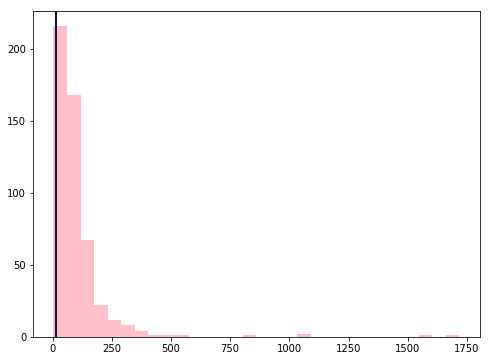

In [6]:
plt.figure(figsize=(8,6))
df['Price'].hist(bins=30,color="pink",grid=False)
plt.axvline(df.loc['FOSL','Price'],color="blue")
plt.axvline(df.loc['DLPH','Price'],color="black")
plt.show()

The stock price is very right skewed. Most stocks are priced under \$250, but there are a few stocks that are more than \$1,000 per share!

The best and worst performers, FOSL and DLPH, have nearly the same price.

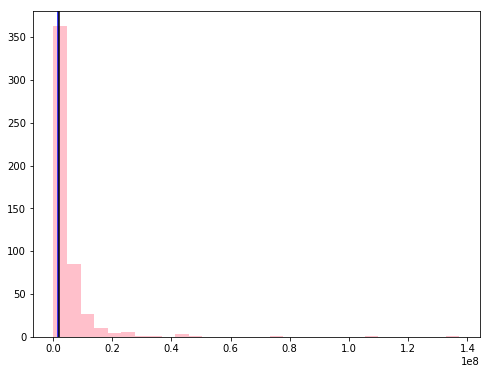

In [7]:
plt.figure(figsize=(8,6))
df['Avg Volume'].hist(bins=30,color="pink",grid=False)
plt.axvline(df.loc['FOSL','Avg Volume'],color="blue")
plt.axvline(df.loc['DLPH','Avg Volume'],color="black")
plt.show()

The Average Volume is also right skewed, where the majority of stocks have an Average Volume less than 2,000,000 (0.2 8 10^8) transactions per day, though there are a few highly traded stocks.

Again, there's not much of a difference between FOSL and DLPH.

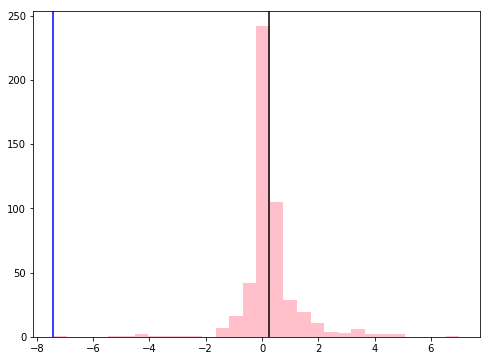

In [8]:
plt.figure(figsize=(8,6))
df['EPS this Y'].hist(bins=30,color="pink",grid=False)
plt.axvline(df.loc['FOSL','EPS this Y'],color="blue")
plt.axvline(df.loc['DLPH','EPS this Y'],color="black")
plt.show()

Unlike Average Volume and Price, the EPS this Year has a symmetric distribution, centered close to 0.

Interestingly, the best performer, FOSL, had a very negative EPS this Year, while the worst performer, DLPH, had an EPS this Year closer to the mean.

Word on the street is that markets are forward looking, so I'll check out the EPS *next* Year.

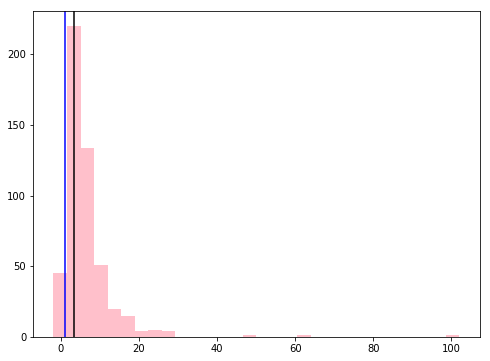

In [9]:
plt.figure(figsize=(8,6))
df['EPS next Y'].hist(bins=30,color="pink",grid=False)
plt.axvline(df.loc['FOSL','EPS next Y'],color="blue")
plt.axvline(df.loc['DLPH','EPS next Y'],color="black")
plt.show()

Now, we see something intersting. FOSL had a very negative EPS this Year, but the EPS next Year is expected to be positive.

The worst perfomer, DLPH, had an EPS next Year that was also close to the mean, and possibly close to the EPS this Year.

Investigating this further, I'll make a new variable, EPS Diff, which takes the difference between these values.

In [10]:
df['EPS Diff'] = df['EPS next Y'] - df['EPS this Y']

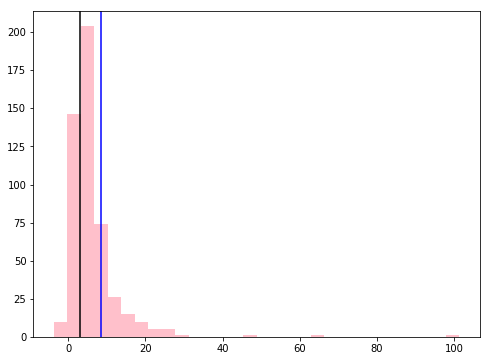

In [11]:
plt.figure(figsize=(8,6))
df['EPS Diff'].hist(bins=30,color="pink",grid=False)
plt.axvline(df.loc['FOSL','EPS Diff'],color="blue")
plt.axvline(df.loc['DLPH','EPS Diff'],color="black")
plt.show()

Hmm... not exactly what I was expecting. Still, I wonder which stock has the extreme value on the right.

In [12]:
df.loc[~df['EPS Diff'].isnull(),['EPS Diff','Perf Year']].sort_values(by='EPS Diff').tail()

,EPS Diff,Perf Year
BLK,27.578,-0.2382
BIIB,28.010,-0.0633
GOOGL,47.096,-0.0123
AZO,62.951,0.1150
BKNG,101.322,-0.0584


The EPS Diff column doesn't seem to be a good predictor of performance.

At this point, I'm starting to look at the relationship between multiple variables. In the next section, I'll look at correlations.

## Correlations

There are a few columns in the clean dataset which are categorical. I'll need to look at all the column names, then remove those which aren't numeric.

In [13]:
df.columns

Index(['P/E', 'EPS (ttm)', 'Insider Own', 'Shs Outstand', 'Perf Week',
       'Market Cap', 'Forward P/E', 'EPS next Y', 'Insider Trans', 'Shs Float',
       'Perf Month', 'Income', 'PEG', 'EPS next Q', 'Inst Own', 'Short Float',
       'Perf Quarter', 'Sales', 'P/S', 'EPS this Y', 'Inst Trans',
       'Short Ratio', 'Perf Half Y', 'Book/sh', 'P/B', 'EPS next Y.1', 'ROA',
       'Target Price', 'Perf Year', 'Cash/sh', 'P/C', 'EPS next 5Y', 'ROE',
       'Perf YTD', 'Dividend', 'P/FCF', 'EPS past 5Y', 'ROI', '52W High',
       'Beta', 'Dividend %', 'Quick Ratio', 'Sales past 5Y', 'Gross Margin',
       '52W Low', 'ATR', 'Employees', 'Current Ratio', 'Sales Q/Q',
       'Oper. Margin', 'RSI (14)', 'Optionable', 'Debt/Eq', 'EPS Q/Q',
       'Profit Margin', 'Rel Volume', 'Prev Close', 'Shortable', 'LT Debt/Eq',
       'Earnings', 'Payout', 'Avg Volume', 'Price', 'Recom', 'SMA20', 'SMA50',
       'SMA200', 'Volume', 'Change', 'avg_daily_high_range',
       'avg_daily_low_range', 'Earnings_

Optionable, Shortable, Earnings_BMO, Earning_AMC, and DJIA are all indicator columns where it doesn't make sense to calculate the correlation coefficient.

I'll turn the column names to a list, then remove the categorical columns.

In [14]:
cols = df.columns.tolist()
cols.remove('Optionable')
cols.remove('Shortable')
cols.remove('Earnings_BMO')
cols.remove('Earnings_AMC')
cols.remove('DJIA')

Now, I can focus on correlations. I'll calculate the correlation matrix, then use the seaborn library to easily make a heatmap.

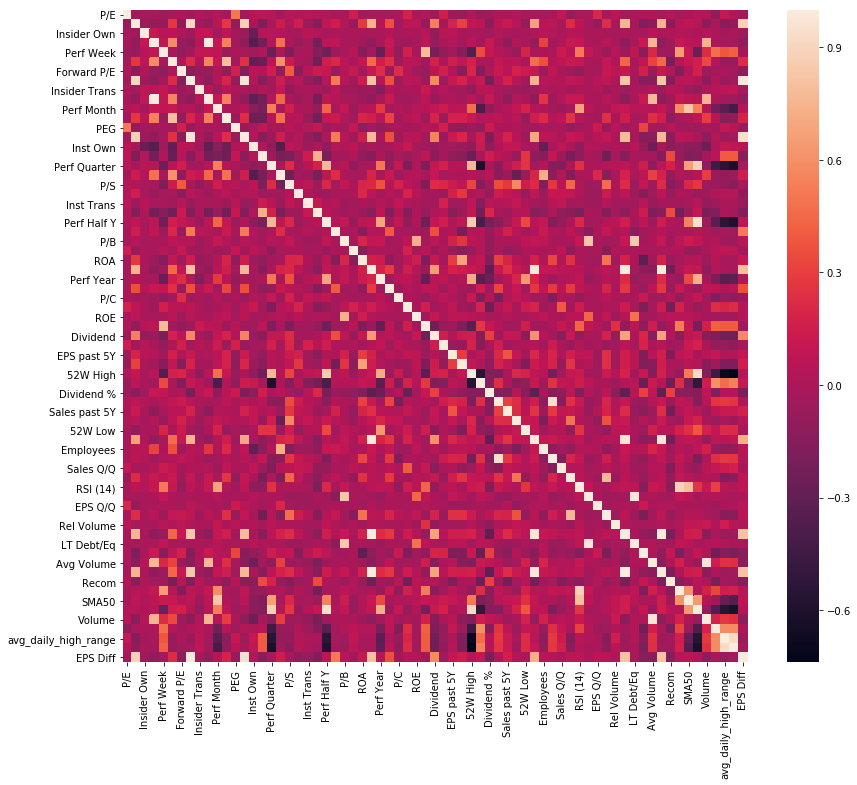

In [15]:
import seaborn as sns
fig = plt.figure(figsize=(14,12))
sns.heatmap(df[cols].corr())
plt.show()

Focusing on the Perf Year variable, i.e. the yearly performance of the stock, we can see some obvious correlations with Perf Half Y, 52W High, 52W Low, and SMA200.

SMA200 is the percentage above the 200 day moving average, so it makes sense that a stock, with a price greater than it's long term trend will have a high yearly performance to date.

In [16]:
df[['Perf Year','SMA200']].corr()

,Perf Year,SMA200
Perf Year,1.000000,0.733483
SMA200,0.733483,1.000000


Looking at the Price there are the obvious correlations with Prev Close and Dividend. 

There's a high correlation between Price and ATR. The ATR is a 14-day exponential moving average the stocks trading range, and if higher priced stocks have larger trading ranges, then this variable makes perfect sense.

*Note to self: Look into this hypotheis*.

In [17]:
df[['Price','ATR']].corr()

,Price,ATR
Price,1.000000,0.973204
ATR,0.973204,1.000000


The Price is also highly correlated with the EPS next Y. This fits very nicely with the *forward-looking* hypothesis for the stock market.

In [18]:
df[['Price','EPS next Y']].corr()

,Price,EPS next Y
Price,1.00000,0.82382
EPS next Y,0.82382,1.00000


However, the EPS (ttm) variable is not *forward-looking*, but it is correlated with price.

EPS (ttm) is defined to be the total earnings in the past 12 months, divided by the total number of shares.

While this is not the highest correlation, it surely means that earnings is factored into the price.

In [19]:
df[['Price','EPS (ttm)']].corr()

,Price,EPS (ttm)
Price,1.000000,0.753068
EPS (ttm),0.753068,1.000000


Lastly, the Target Price column is highly correlated with Price.

In [20]:
df[['Price','Target Price']].corr()

,Price,Target Price
Price,1.000000,0.994728
Target Price,0.994728,1.000000


The Target Price is the mean price target from analysts.

I believe that analysts are basing their targets off of the current stock price. Hence, target price is a function of current price.

Here's a scatter plot, with regression line, showing this relationship.

In [21]:
from scipy.stats import linregress
x = df.loc[~df['Target Price'].isnull(),'Target Price']
y = df.loc[~df['Target Price'].isnull(),'Price']

lr = linregress(x,y)
yhat = lr.intercept + x * lr.slope

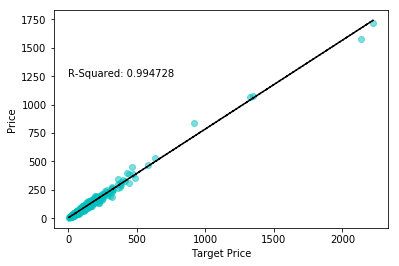

In [22]:
plt.plot(x,y,'co',alpha = 0.5)
plt.plot(x,yhat,'k--')
plt.xlabel('Target Price')
plt.ylabel('Price')
plt.annotate("R-Squared: %f" % (lr.rvalue),(1.5,1250))
plt.show()

## Categorical Variables

Optionable, Shortable, DJIA, Earnings_BMO and Earnings_AMC are all categorical/indicator variables in the dataset.

Here are summary statistics.

In [29]:
df[['Optionable','Shortable','DJIA','Earnings_BMO','Earnings_AMC']].describe()

,Optionable,Shortable,DJIA,Earnings_BMO,Earnings_AMC
count,505.0,505.000000,505.000000,505.000000,505.000000
mean,1.0,0.996040,0.059406,0.594059,0.403960
std,0.0,0.062869,0.236617,0.491560,0.491176
min,1.0,0.000000,0.000000,0.000000,0.000000
25%,1.0,1.000000,0.000000,0.000000,0.000000
50%,1.0,1.000000,0.000000,1.000000,0.000000
75%,1.0,1.000000,0.000000,1.000000,1.000000
max,1.0,1.000000,1.000000,1.000000,1.000000


Optionable only takes on the value 1, and there are only 2 S&P 500 stocks that aren't shortable.

In [32]:
df['Shortable'].value_counts()

1    503
0      2
Name: Shortable, dtype: int64

Still, I can see how Dow membership or the type of earnings announcement affect yearly performance.

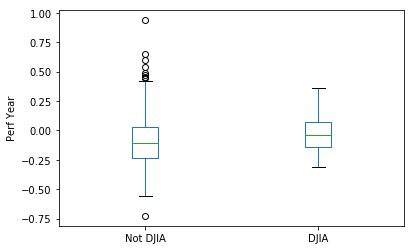

In [40]:
import warnings
warnings.simplefilter('ignore')
df.boxplot('Perf Year',by='DJIA',grid=False)
plt.xticks([1,2],['Not DJIA','DJIA'])
plt.xlabel('')
plt.title('')
plt.ylabel('Perf Year')
plt.suptitle('')
plt.show()

On average Dow members have a higher mean performance, though there are several outliers, which aren't Dow members, which outperform the Dow members.

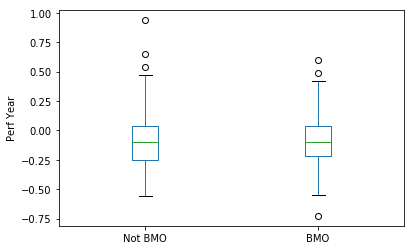

In [41]:
warnings.simplefilter('ignore')
df.boxplot('Perf Year',by='Earnings_BMO',grid=False)
plt.xticks([1,2],['Not BMO','BMO'])
plt.title('')
plt.xlabel('')
plt.ylabel('Perf Year')
plt.suptitle('')
plt.show()

There doesn't appear to be much of a difference between stocks with earnings announced before the market opens (BMO) and stocks that don't announce earnings BMO.

## Conclusion


I've learned a fair amount about this dataset (and about plotting too). Summarizing everything,

* FOSL had the best yearly performance.
* DLPH had the worst yearly performance.
* Half-year performance, 52 Week High, 52 Week Low, Percentage above the 200 day simple moving average are all correlated with yearly performance.
* The Previous Close, Dividend, ATR, EPS next year, EPS this year and Target Price are correlatd with a stock's price.
* Dow members perform better than non-Dow members, on average.
* The timing of an earnings announcement (alone) has little to no effect on yearly performance.

In the next project, I'll use this dataset one last time to do some Clustering.

Thanks for reading.